In [1]:
import pandas_datareader.data as web
# 第一個數據
predict_days = 5 # 用過去七天預測下一天
df = web.DataReader('2330.tw', 'yahoo', '1999-01-01', '2020-06-15')
data = df.reset_index()
data['TickerId']   = '2330'
data['TickerName'] = '台積電'
data[-3:]

C:\python37\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


Date   High    Low   Open  Close      Volume  Adj Close TickerId  \
5034 2020-06-11  327.0  318.5  325.5  320.5  50104255.0      320.5     2330   
5035 2020-06-12  317.5  312.5  313.0  316.0  45992918.0      316.0     2330   
5036 2020-06-15  317.5  308.5  316.0  309.5  50612000.0      309.5     2330   

     TickerName  
5034        台積電  
5035        台積電  
5036        台積電

In [2]:
# 前面天數會有NAN
tsmc = data[['Close']][:100]
tsmc['t-5'] = tsmc.Close.shift(5)
tsmc['t-4'] = tsmc.Close.shift(4)
tsmc['t-3'] = tsmc.Close.shift(3)
tsmc['t-2'] = tsmc.Close.shift(2)
tsmc['t-1'] = tsmc.Close.shift(1)
tsmc['t-0'] = tsmc['Close']
tsmc.drop(columns='Close', inplace=True)
tsmc

t-5        t-4        t-3        t-2        t-1        t-0
0         NaN        NaN        NaN        NaN        NaN  69.649002
1         NaN        NaN        NaN        NaN  69.649002  71.214104
2         NaN        NaN        NaN  69.649002  71.214104  69.649002
3         NaN        NaN  69.649002  71.214104  69.649002  67.692497
4         NaN  69.649002  71.214104  69.649002  67.692497  70.040199
..        ...        ...        ...        ...        ...        ...
95  75.518303  73.561798  70.040199  72.387901  70.619301  74.876297
96  73.561798  70.040199  72.387901  70.619301  74.876297  79.634399
97  70.040199  72.387901  70.619301  74.876297  79.634399  81.638100
98  72.387901  70.619301  74.876297  79.634399  81.638100  81.137001
99  70.619301  74.876297  79.634399  81.638100  81.137001  79.133797

[100 rows x 6 columns]

In [3]:
# 後面天數 會有NAN
tsmc = data[['Close']][:100]
tsmc['Close+1'] = tsmc.Close.shift(-1)
tsmc['Close+2'] = tsmc.Close.shift(-2)
tsmc['Close+3'] = tsmc.Close.shift(-3)
tsmc['Close+4'] = tsmc.Close.shift(-4)
tsmc['Close+5'] = tsmc.Close.shift(-5)
tsmc[:]

Close    Close+1    Close+2    Close+3    Close+4    Close+5
0   69.649002  71.214104  69.649002  67.692497  70.040199  68.866302
1   71.214104  69.649002  67.692497  70.040199  68.866302  70.822899
2   69.649002  67.692497  70.040199  68.866302  70.822899  69.649002
3   67.692497  70.040199  68.866302  70.822899  69.649002  71.214104
4   70.040199  68.866302  70.822899  69.649002  71.214104  73.170601
..        ...        ...        ...        ...        ...        ...
95  74.876297  79.634399  81.638100  81.137001  79.133797        NaN
96  79.634399  81.638100  81.137001  79.133797        NaN        NaN
97  81.638100  81.137001  79.133797        NaN        NaN        NaN
98  81.137001  79.133797        NaN        NaN        NaN        NaN
99  79.133797        NaN        NaN        NaN        NaN        NaN

[100 rows x 6 columns]

In [4]:
# 樣本SAMPLE
from pandas import DataFrame
df = DataFrame()
df['t'] = [x for x in range(10)]
df['t-5'] = df.t.shift(5)
df['t-4'] = df.t.shift(4)
df['t-3'] = df.t.shift(3)
df['t-2'] = df.t.shift(2)
df['t-1'] = df.t.shift(1)
df['t-0'] = df['t']
df.drop(columns='t', inplace=True)
df

t-5  t-4  t-3  t-2  t-1  t-0
0  NaN  NaN  NaN  NaN  NaN    0
1  NaN  NaN  NaN  NaN  0.0    1
2  NaN  NaN  NaN  0.0  1.0    2
3  NaN  NaN  0.0  1.0  2.0    3
4  NaN  0.0  1.0  2.0  3.0    4
5  0.0  1.0  2.0  3.0  4.0    5
6  1.0  2.0  3.0  4.0  5.0    6
7  2.0  3.0  4.0  5.0  6.0    7
8  3.0  4.0  5.0  6.0  7.0    8
9  4.0  5.0  6.0  7.0  8.0    9

In [5]:
# 樣本變更台積電數據 製作成前五天預測下一天 

from pandas import DataFrame
df = DataFrame()
df['t'] = [x for x in range(10)]
df['t+1'] = df.t.shift(-1)
df['t+2'] = df.t.shift(-2)
df

t  t+1  t+2
0  0  1.0  2.0
1  1  2.0  3.0
2  2  3.0  4.0
3  3  4.0  5.0
4  4  5.0  6.0
5  5  6.0  7.0
6  6  7.0  8.0
7  7  8.0  9.0
8  8  9.0  NaN
9  9  NaN  NaN

In [6]:
# 自己寫一個函數
# series_to_supervised()
from pandas import DataFrame
from pandas import concat
 
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# 驗證台積電數據
# 前面幾次的數據 n_in 去預測後面幾次的數據 n_out
values = data.Close.tolist()
data2 = series_to_supervised(values, n_in=predict_days, n_out=1, dropnan=True) #*************優化過去幾天 預測下一天

In [7]:
# 提示
# 取出 X , y
X = data2.iloc[:, :-1].values
y = data2.iloc[:, [-1]].values
# 花五分鐘思考
# 資料切割 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4025, 5), (4025, 1), (1007, 5), (1007, 1))

In [8]:
# 建置模型
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
print(reg.predict(X_test)[:3] )
print('-'*50)
print(y_test[:3])

[[ 44.83395443]
 [ 67.66147521]
 [147.29774465]]
--------------------------------------------------
[[ 43.96409988]
 [ 66.39630127]
 [147.5       ]]


In [10]:
# 預測所有數據 ???
pre_Close = reg.predict(X)
data_plot = data[:-1*predict_days].copy() #****************************根據   優化過去幾天 預測下一天  而變動
data_plot['pre_Close'] = pre_Close
data_plot[:3]

Date       High        Low       Open      Close        Volume  \
0 2000-01-04  69.649002  68.475197  69.649002  69.649002  2.006623e+11   
1 2000-01-05  71.214104  68.866302  69.649002  71.214104  4.024668e+11   
2 2000-01-06  71.214104  69.649002  70.822899  69.649002  1.975457e+11   

   Adj Close TickerId TickerName  pre_Close  
0  37.328552     2330        台積電  70.068005  
1  38.167374     2330        台積電  69.071982  
2  37.328552     2330        台積電  70.775895

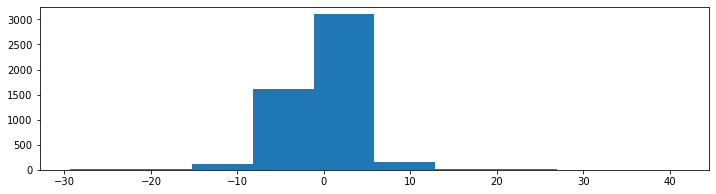

In [11]:
# 預測 與 實際的金額差異
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,3))
plt.hist( data_plot.Close - data_plot.pre_Close )
plt.show()

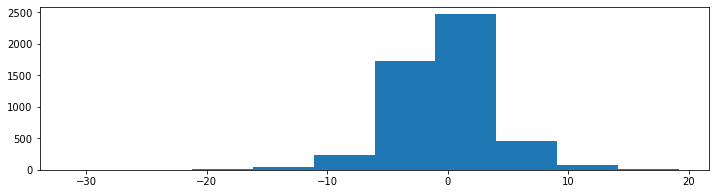

In [12]:
# 預測 與 實際的金額差異
import matplotlib.pyplot as plt
plt.figure(figsize=(12,3))
plt.hist( (data_plot.Close - data_plot.pre_Close) / data_plot.Close * 100 )
plt.show()

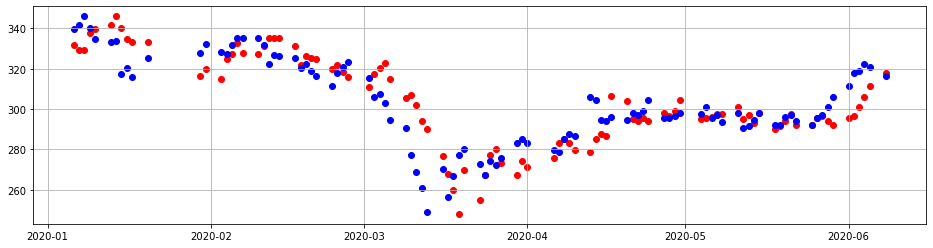

In [13]:
# 檢視預測狀況

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
last_days = -100
plt.figure(figsize=(16,4))
plt.grid()
plt.scatter(pd.to_datetime(data_plot[last_days:].Date), data_plot[last_days:].Close, color='red')

plt.scatter(pd.to_datetime(data_plot[last_days:].Date), data_plot[last_days:].pre_Close, color='blue')
plt.show()

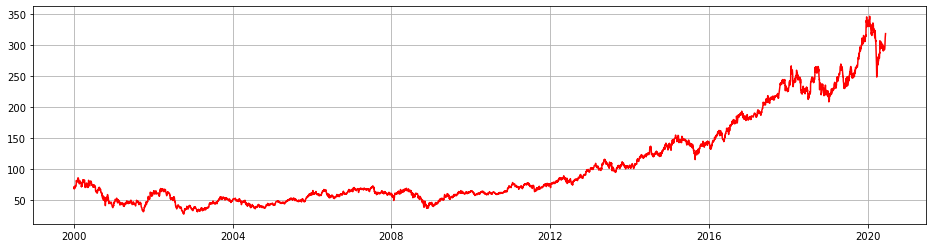

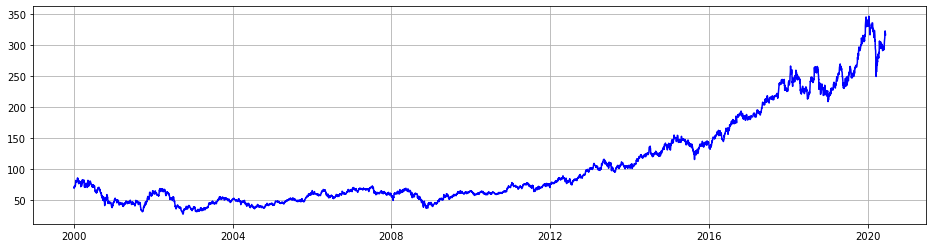

In [14]:
# 檢視預測狀況

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(16,4))
plt.grid()
plt.plot(pd.to_datetime(data_plot.Date), data_plot.Close, color='red')
plt.show()

plt.figure(figsize=(16,4))
plt.grid()
plt.plot(pd.to_datetime(data_plot.Date), data_plot.pre_Close, color='blue')
plt.show()

In [15]:
# mse 
# mean sqr error
# (predict - truth) ** 2 / n
# 這是預測數據 使用 Machine Learning 的 部分
# mse 重要數據
sum((data_plot.Close - data_plot.pre_Close)**2) / data_plot.shape[0]

15.327625705014388

In [16]:
# 針對最近數據預測
data[-14:]

Date   High    Low   Open  Close      Volume  Adj Close TickerId  \
5023 2020-05-27  298.0  295.5  297.0  296.5  23375959.0      296.5     2330   
5024 2020-05-28  298.5  293.0  298.5  294.0  28444568.0      294.0     2330   
5025 2020-05-29  292.5  290.0  292.0  292.0  79774181.0      292.0     2330   
5026 2020-06-01  296.5  293.5  294.0  295.5  35811214.0      295.5     2330   
5027 2020-06-02  297.5  296.0  296.0  296.5  24771587.0      296.5     2330   
5028 2020-06-03  301.0  298.0  300.0  301.0  65176337.0      301.0     2330   
5029 2020-06-04  306.0  304.0  305.0  306.0  46572451.0      306.0     2330   
5030 2020-06-05  312.0  308.0  308.5  311.5  42981262.0      311.5     2330   
5031 2020-06-08  319.0  315.0  316.0  318.0  50302921.0      318.0     2330   
5032 2020-06-09  319.0  314.0  316.5  319.0  36417082.0      319.0     2330   
5033 2020-06-10  324.0  318.0  319.0  322.5  39984259.0      322.5     2330   
5034 2020-06-11  327.0  318.5  325.5  320.5  50104255.0      320.5     2330   
5035 2020-06-12  317.5  312.5  313.0  316.0  45992918.0      316.0     2330   
5036 2020-06-15  317.5  308.5  316.0  309.5  50612000.0      309.5     2330   

     TickerName  
5023        台積電  
5024        台積電  
5025        台積電  
5026        台積電  
5027        台積電  
5028        台積電  
5029        台積電  
5030        台積電  
5031        台積電  
5032        台積電  
5033        台積電  
5034        台積電  
5035        台積電  
5036        台積電

In [17]:
# 最後一筆數據
X[-1] # 20200416-20200422 --> 20200423

array([318. , 319. , 322.5, 320.5, 316. ])

In [18]:
data.Date[-1:].dt.strftime("%Y%m%d").values[0]
from datetime import timedelta
(data.Date[-1:] + timedelta(days=1)).dt.strftime("%Y-%m-%d").values[0]

'2020-06-16'

In [19]:
# 預測下個十天TSMC 股價
import numpy as np

# 下一天
next_data = X[-1]
next_day = reg.predict(X[-1].reshape(1,-1))
print(next_day[0], data.Date[-1:].dt.strftime("%Y-%m-%d").values[0])

# 剩下的天數 再預測
for i in range(1, 10, 1):
    next_data = np.hstack( (next_data , next_day[0]) )[-1*predict_days:]
    next_day = reg.predict(next_data.reshape(1,-1))
    print(next_day[0],  (data.Date[-1:] + timedelta(days=i)).dt.strftime("%Y-%m-%d").values[0]  )

# 請預測下一個月的股價 並且 畫圖

[316.20464504] 2020-06-15
[316.46107993] 2020-06-16
[316.94952068] 2020-06-17
[317.29504839] 2020-06-18
[317.56038827] 2020-06-19
[317.81652986] 2020-06-20
[318.07390121] 2020-06-21
[318.33705894] 2020-06-22
[318.60212186] 2020-06-23
[318.86754584] 2020-06-24
